
Data Overview:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribo

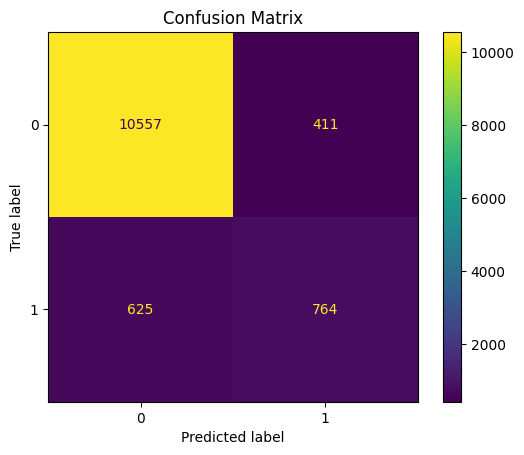


Top 10 Important Features:
              Feature  Importance
1            duration    0.502617
10        nr.employed    0.356862
3               pdays    0.038822
9           euribor3m    0.035442
8       cons.conf.idx    0.033976
46          month_oct    0.014929
7      cons.price.idx    0.007016
38  contact_telephone    0.002925
2            campaign    0.002818
48    day_of_week_mon    0.002485


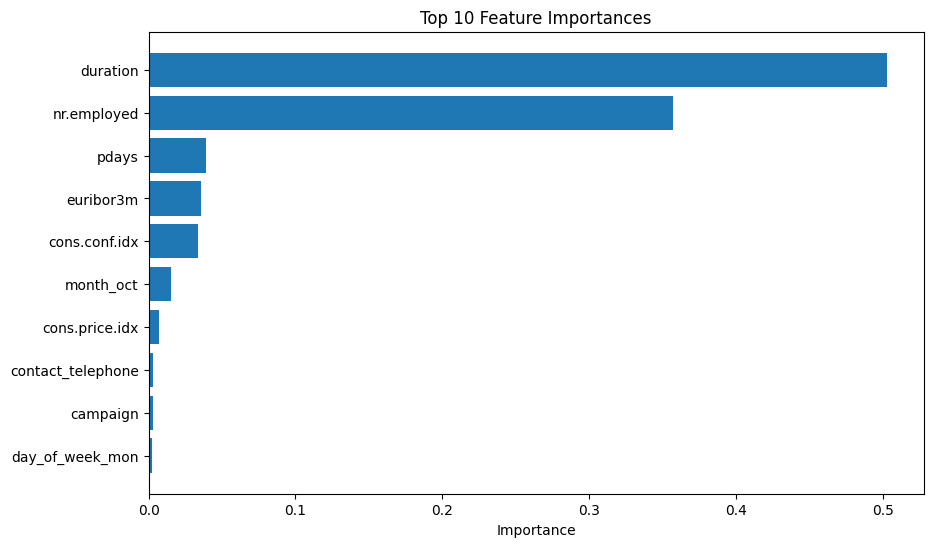

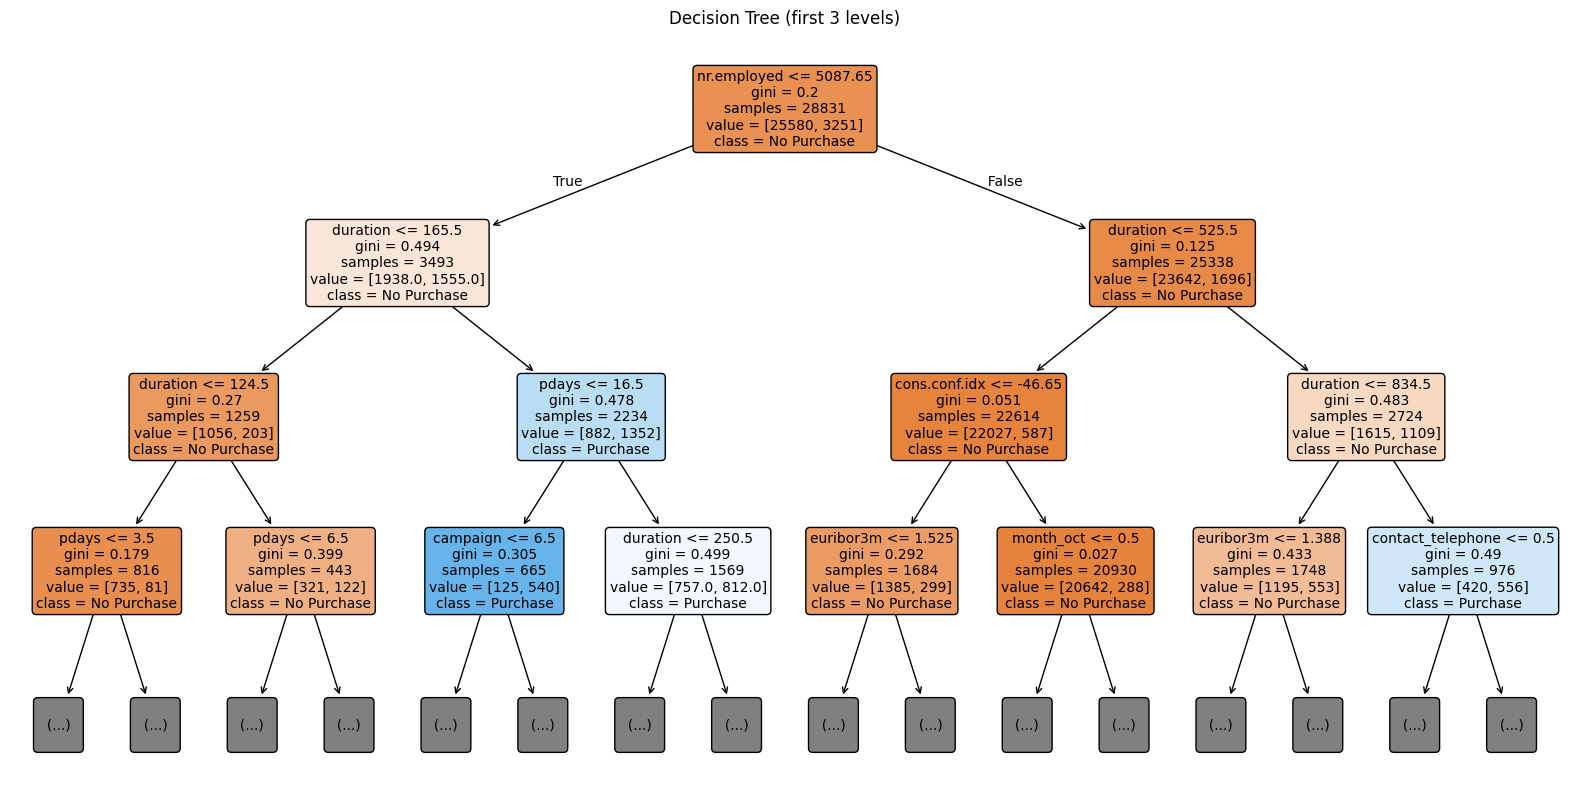


Example Prediction:
Probability of Purchase: 0.01
Predicted Class: No Purchase


In [13]:
# Decision Tree Classifier for Bank Marketing Dataset
import pandas as pd
import numpy as np
import zipfile
import requests
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, 
                            classification_report, 
                            confusion_matrix, 
                            ConfusionMatrixDisplay)
import matplotlib.pyplot as plt

# Step 1: Download and extract the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
zip_file_path = "bank-additional.zip"
csv_file_path = "bank-additional/bank-additional-full.csv"

# Download the ZIP file
if not os.path.exists(zip_file_path):
    print("Downloading dataset...")
    response = requests.get(url)
    with open(zip_file_path, 'wb') as f:
        f.write(response.content)
    print("Download complete.")

# Extract the CSV file from the ZIP archive
if not os.path.exists(csv_file_path):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall("bank-additional")
    print("Extraction complete.")

# Step 2: Load the dataset
data = pd.read_csv(csv_file_path, sep=';')

# Step 3: Data Exploration and Preprocessing
print("\nData Overview:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

# Convert target variable to binary (0/1)
data['y'] = LabelEncoder().fit_transform(data['y'])

# Identify categorical columns
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
print(f"\nCategorical Columns: {categorical_cols}")

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols[:-1], drop_first=True)

# Step 4: Split data into features and target
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Build and Train Decision Tree Model
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

print("\nTraining Decision Tree Model...")
dt_model.fit(X_train, y_train)

# Step 6: Evaluate the Model
# Training set evaluation
y_train_pred = dt_model.predict(X_train)
print("\nTraining Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(classification_report(y_train, y_train_pred))

# Test set evaluation
y_test_pred = dt_model.predict(X_test)
print("\nTest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Step 7: Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], 
         feature_importance['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Step 8: Visualize the Decision Tree (small tree for visualization)
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    filled=True,
    rounded=True,
    class_names=['No Purchase', 'Purchase'],
    feature_names=X.columns,
    max_depth=3,
    fontsize=10
)
plt.title("Decision Tree (first 3 levels)")
plt.show()

# Step 9: Predict on New Data (example)
print("\nExample Prediction:")
example_data = X_test.iloc[0:1]
probabilities = dt_model.predict_proba(example_data)[0]
print(f"Probability of Purchase: {probabilities[1]:.2f}")
print(f"Predicted Class: {'Purchase' if probabilities[1] > 0.5 else 'No Purchase'}")
